In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATAFRAMES = os.path.join("..", "..", "..", "results", "dataframes", "")
FIGURES = os.path.join("..", "..", "..", "results", "figures", "")

# Data preprocessing

In [3]:
# Load data
df = pd.read_csv(os.path.join(DATAFRAMES, "real_subsets", "dataframe_ex-euair.csv"))

print(df.columns)

Index(['system', 'layers', 'theta', 'embedding', 'accuracy', 'auroc', 'pr',
       'intercept', 'coef_distances', 'coef_degrees'],
      dtype='object')


In [4]:
# Global transformations
df["relative_impact"] = np.abs(df["coef_distances"]) / (np.abs(df["coef_degrees"]) + np.abs(df["coef_distances"]))

In [5]:
# Global melts for easier declarative plotting
df = df.melt(
    id_vars=["embedding", "layers", "theta", "intercept", "coef_distances", "coef_degrees", "relative_impact"],
    value_vars=["accuracy", "auroc", "pr"],
    var_name="perftype", value_name="perfval"
).melt(
    id_vars=["embedding", "layers", "theta", "perftype", "perfval"],
    value_vars=["intercept", "coef_distances", "coef_degrees", "relative_impact"],
    var_name="featuretype",
    value_name="featureval"
)

# Figures

## Performance

In [12]:
df_ = df.query("perftype == 'pr'")
df_ = df_.query("embedding != 'LE'")  # tmp
THETAS = sorted(df_["theta"].unique())

<Figure size 640x480 with 0 Axes>

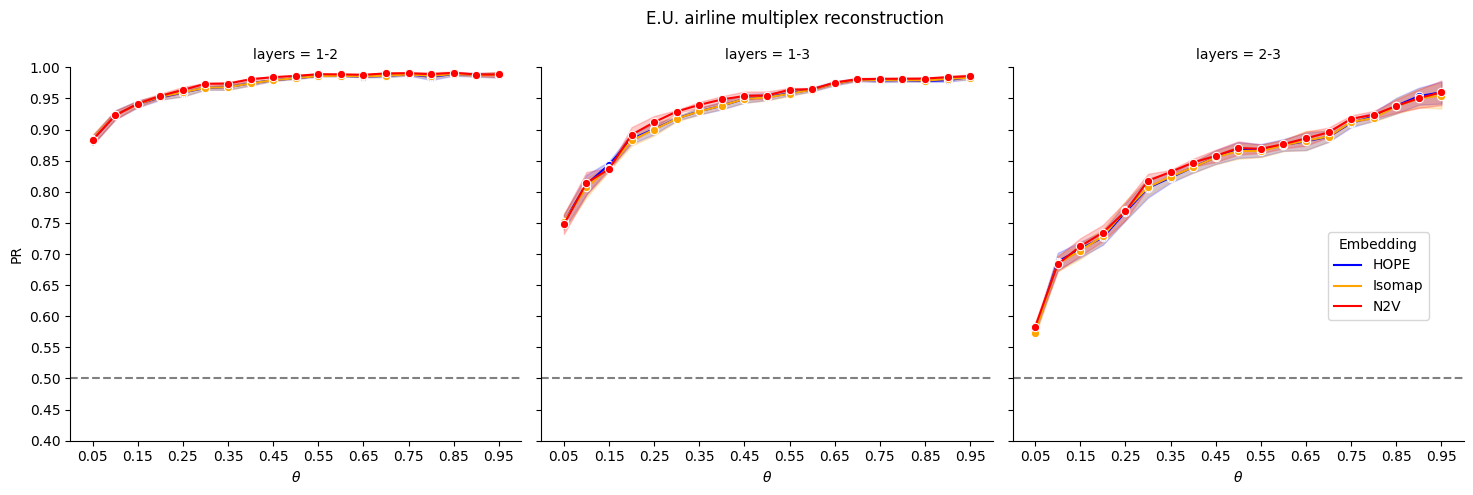

In [16]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="perfval",
    hue="embedding",
    # palette=["black", "blue", "orange", "green", "red"],
    palette=["blue", "orange", "red"],
    col="layers",
    marker="o",
)

# Adjust axes
g.set_axis_labels(r'$\theta$', 'PR')
g.set(
    xlim=(0,1), xticks=THETAS[::2],
    ylim=(0.4, 1), yticks=np.linspace(0.4, 1.0, 13)
)
g.tick_params(axis="x", labelrotation=00)
g.tick_params(axis="y", which="minor")

# Adjust subplots
g.fig.subplots_adjust(top=0.9)
g.refline(y=0.5)

# Adjust figure
g.fig.suptitle("E.U. airline multiplex reconstruction")
sns.move_legend(g,
    loc="upper right", bbox_to_anchor=(0.9, 0.55),
    title="Embedding",
    frameon=True)

# Save to disk
g.tight_layout()
# g.savefig(
#     os.path.join(FIGURES, "figure_auroc-pfi_hue-embedding_col-ex_data-ex01-thru-ex05.png"),
#     transparent=False,
#     facecolor="white",
#     dpi=600)

## Coefficients

In [20]:
df_ = df_.query("featuretype == 'relative_impact'")
df_["featureval"] = df_["featureval"].apply(lambda x: np.abs(x))

<Figure size 640x480 with 0 Axes>

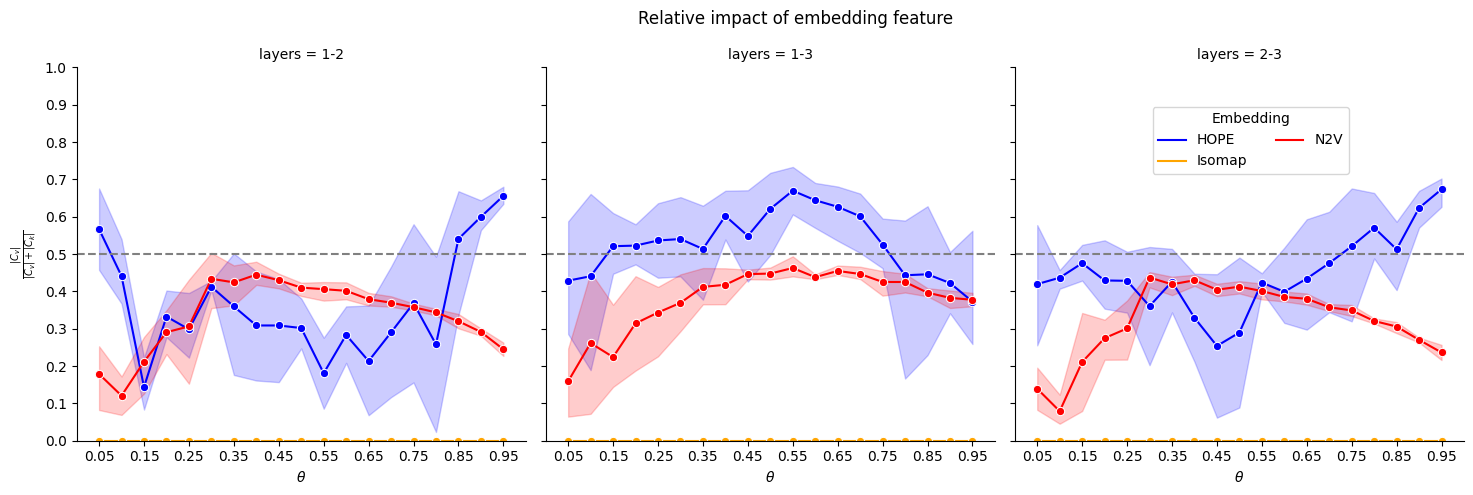

In [21]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="featureval",
    hue="embedding",
    palette=["blue", "orange", "red"],
    col="layers",
    marker="o",
)

# Adjust axes
g.set_axis_labels(r'$\theta$', r'$\frac{|C_v|}{|C_v| + |C_k|}$')
g.set(
    xlim=(0,1), xticks=THETAS[::2],
    ylim=(0.0, 1), yticks=np.linspace(0.0, 1.0, 11)
)
g.tick_params(axis="x", labelrotation=00)
g.tick_params(axis="y", which="minor")

# Adjust subplots
g.fig.subplots_adjust(top=0.9)
g.refline(y=0.5)

# Adjust figure
g.fig.suptitle("Relative impact of embedding feature")
sns.move_legend(g,
    loc="upper right", bbox_to_anchor=(0.85, 0.8),
    title="Embedding",
    ncol=2,
    frameon=True)

# Save to disk
g.tight_layout()
# g.savefig(
#     os.path.join(FIGURES, "figure_coef-pfi_hue-embedding_col-ex_data-ex01-thru-ex05.png"),
#     transparent=False,
#     facecolor="white",
#     dpi=600)